


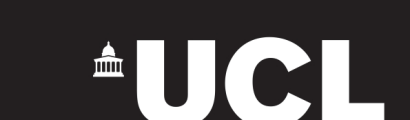

*   Student Number: 2218993
*   Module Code: BCPM0090
*   Module Title: Big Data and Business Analytics
*   Module Leader: Dr Carlos Galera-Zarco


---








# **1. Problem Statement**

**Prediction of Employees Promotion & Analyzing Factors that Affecting Promotions**

## **1.1. Justifying the Dataset**

The dataset appears to contain information about employees in an organization and the results of their promotions. It consists of several lines (items) that provide information about the characteristics and characteristics of each employee. Here is a detailed description of each columns.


• employee_id - Unique ID for employee

• department - Department of employee

• region - Region of employment (unordered)

• education - Education Level

• gender - Gender of Employee

• recruitment_channel - Channel of recruitment for employee / sourcing (proactive searching for qualified job candidates for current or planned open positions)

• nooftrainings - number of other trainings completed in previous year on soft skills, technical skills etc.

• age - Age of Employee

• previousyearrating - Employee Rating for the previous year (1-5 / 1 min 5 max)

• lengthofservice - Length of service in years

• KPIs_met >80% - if Percent of KPIs (Key performance Indicators) >80% then 1 else 0

• awards_won? - if awards won during previous year, then 1 else 0

• avgtrainingscore - Average score in current training evaluations – (1-100)

• is_promoted (Could be a Target variable) Recommended for promotion 0 (No), 1 (Yes)

## **1.1.2 State the Rationale for Selecting the DS**

• The choice to use a third dataset with a larger size of 54,809 rows and 14 columns can be justified by several important priorities, its larger amount of data offers a greater advantage over statistical analysis, and provides large sample sizes that strengthen the robustness and reliability of any findings Rich data sets in terms of factors including f variables allow detailed analysis of the data This diversity is extremely valuable for analysis in-depth, including data visualization and machine learning models. Additionally, the "is_promoted" column of the dataset indicates its potential use in predicting employee promotion, etc., if there is an appropriate class balance in. Finally, the selection also depends on how the dataset and research specific questions, business objectives, or hypotheses. If it meets these criteria and exhibits good data quality, then choosing a third dataset is an appropriate decision. However, further research and preprocessing of data as necessary to ensure the adequacy of standardized research, is needed.

• In the second set of data for Apps, there are only 9658 training data, which is obviously not suitable for machine learning models.

• For the first data set, there are fewer columns and rows than the third & second set, so there will be fewer changes to be analyzed. nd no regression or classification objectives are particularly clear.

### **1.1.1. EDA of the Selected Dataset**

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
import statsmodels.api as sm
import plotly.express as px
import scipy

In [157]:
import sklearn
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor

from scipy.cluster.vq import kmeans, vq, whiten
from scipy.spatial.distance import cdist
import numpy as np
from datetime import datetime

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [159]:
# Data Loading Process

df = pd.read_csv("DATASET3_EMPLOYEES.csv")

In [160]:
# Data Checking

df.head(10) #TOP 10

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


In [161]:
df.tail(10) #BOTTOM 10

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54798,40257,Sales & Marketing,region_2,Master's & above,f,other,2,40,5.0,4,1,0,51,0
54799,68093,Procurement,region_2,Master's & above,f,other,1,50,5.0,6,1,1,67,0
54800,39227,HR,region_11,Bachelor's,m,other,2,34,5.0,3,0,0,52,0
54801,12431,Technology,region_26,Bachelor's,f,sourcing,1,31,NaN,1,0,0,78,0
54802,6915,Sales & Marketing,region_14,Bachelor's,m,other,2,31,1.0,2,0,0,49,0
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,0,49,0


In [162]:
df.info()  # Checking Null Values of Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [163]:
list(df.columns) #Columns List

['employee_id',
 'department',
 'region',
 'education',
 'gender',
 'recruitment_channel',
 'no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'KPIs_met >80%',
 'awards_won?',
 'avg_training_score',
 'is_promoted']

In [164]:
df.describe() # STATS of NUM VAR

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


## **1.2. Define the Research Problem**


**Problem Statement: Prediction of Employees Promotion & Analyzing Factors that Affecting Promotions**

Based on available employee data we aim to build predictive models using machine learning to predict employee development within the company. The survey will focus on employee characteristics such as department, education, performance considerations and demographics. Subsequently, we will develop and interpret the results of the model to identify the most important factors affecting employee development. This study seeks to gain insights into the key determinants of employee development and provides actionable recommendations for talent management and HR strategies within the organization.



## **1.3. Explain the Characteristics of DS**

In [165]:
df.info() # Checking Null Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [166]:
# Lets See Total Promoted & Not Promoted Employees

promoted_count = df['is_promoted'].sum()
not_promoted_count = len(df) - promoted_count

print(f"Promoted:- {promoted_count} Employees")
print(f"Not Promoted:- {not_promoted_count} Employees")

Promoted:- 4668 Employees
Not Promoted:- 50140 Employees


In [167]:
print("Promotion Rate:",4668/54808*100,"%")
print("Not Promoted Rate:",50140/54808*100,"%")

Promotion Rate: 8.517004816815064 %
Not Promoted Rate: 91.48299518318494 %


In [168]:
t = pd.crosstab(index=df['is_promoted'], columns=df['age'],margins=True)
print(t)

age           20  21   22   23   24    25    26    27    28    29  ...   52  \
is_promoted                                                        ...        
0            109  93  213  394  775  1230  1897  2566  2839  3111  ...  323   
1              4   5   18   34   70    69   163   261   308   294  ...   28   
All          113  98  231  428  845  1299  2060  2827  3147  3405  ...  351   

age           53   54   55   56   57   58   59   60    All  
is_promoted                                                 
0            350  289  276  243  233  197  192  203  50140  
1             14   24   18   21    5   16   17   14   4668  
All          364  313  294  264  238  213  209  217  54808  

[3 rows x 42 columns]


In [169]:
awards_won_count = df['awards_won?'].sum()
print(f"Awards Winner Employees: Total {awards_won_count} Employees")

Awards Winner Employees: Total 1270 Employees


In [170]:
# Highest & Lowest Training Score

highest_training_score = df['avg_training_score'].max()
lowest_training_score = df['avg_training_score'].min()

In [171]:
print(f"Highest Training Score:- {highest_training_score}")
print(f"Lowest Training Score:- {lowest_training_score}")

Highest Training Score:- 99
Lowest Training Score:- 39


In [172]:
count_highest_training_score = (df['avg_training_score'] == highest_training_score).sum()
count_lowest_training_score = (df['avg_training_score'] == lowest_training_score).sum()

In [173]:
print(f"Highest Training Scores Employees ({highest_training_score}): Total {count_highest_training_score} Employees")
print(f"Lowest Training Scores Employees ({lowest_training_score}): Total {count_lowest_training_score} Employees")

Highest Training Scores Employees (99): Total 35 Employees
Lowest Training Scores Employees (39): Total 2 Employees


In [174]:
# Count on Previous Year Rating

rating_counts = df['previous_year_rating'].value_counts(dropna=False)

print("Count of employees by previous year rating:")
print(rating_counts)

Count of employees by previous year rating:
3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
NaN     4124
Name: previous_year_rating, dtype: int64


## **1.3.1 Data Type**

The DS is a .csv file, which can be displayed in a table form, so it is **Structured Data**.

## **1.3.2 Variables**

• There are a 14 columns of data in total, each with 54809 Entries. For example, The variable -"employee_id"- is an integer, and the variable -"previous_year_rating"- is a float type.

• Variable such as 'department',  'region', 'education', 'gender', 'recruitment_channel' are not numerical variables.

• So they need to be converted into numeric variables later for modelling analysis.

## **1.3.3 Initial Potential**

First,I count the Promotion & Not Promoted rate of all Employees. As you can see, the Promotion rate is 8.517004816815064% which is slightly less than the Non Promotion rate of 91.48299518318494%.

In employee development research, "early potential" refers to the assessment of an employee's ability to achieve career advancement in an organization at an early stage of employment This analysis includes a variety of indicators that provide insight into an employee's potential some have to climb the career ladder These factors include their educational background, early career, early career, program schedule, dates, professional commitment, commitments, managerial reactions, and completion of key demonstrations. It is important from the beginning. By identifying employees with promising potential early on, organizations can tailor development plans to help them fulfill their career aspirations and contribute significantly to the organization’s long-term success.

## **1.4. Process of Cleaning & Tidying the DB**




In [175]:
df.isnull().sum(axis=0)

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [176]:
# Missing Value Handling

median_rating = df['previous_year_rating'].median()
df['previous_year_rating'].fillna(median_rating, inplace=True) # replace missing values with median
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [177]:
feature_columns = ['employee_id',
 'department',
 'region',
 'education',
 'gender',
 'recruitment_channel',
 'no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'KPIs_met >80%',
 'awards_won?',
 'avg_training_score',
 'is_promoted']
features = df[feature_columns]
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [178]:
# Target Variable

promotion_distribution = df['is_promoted'].value_counts(normalize=True)

print("Distribution of 'is_promoted':")
print(promotion_distribution)

Distribution of 'is_promoted':
0    0.91483
1    0.08517
Name: is_promoted, dtype: float64


is_promoted:- This binary target variable can take one of two values:-

1] "1" or "Yes" represents that the employee was promoted.

2] "0" or "No" represents that the employee was not promoted.

In [179]:
df = pd.get_dummies(df, columns=['department', 'gender'], drop_first=True)
df

,employee_id,region,education,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,...,is_promoted,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,gender_m
0,65438,region_7,Master's & above,sourcing,1,35,5.0,8,1,0,...,0,0,0,0,0,0,0,1,0,0
1,65141,region_22,Bachelor's,other,1,30,5.0,4,0,0,...,0,0,0,0,1,0,0,0,0,1
2,7513,region_19,Bachelor's,sourcing,1,34,3.0,7,0,0,...,0,0,0,0,0,0,0,1,0,1
3,2542,region_23,Bachelor's,other,2,39,1.0,10,0,0,...,0,0,0,0,0,0,0,1,0,1
4,48945,region_26,Bachelor's,other,1,45,3.0,2,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,region_14,Bachelor's,sourcing,1,48,3.0,17,0,0,...,0,0,0,0,0,0,0,0,1,1
54804,74592,region_27,Master's & above,other,1,37,2.0,6,0,0,...,0,0,0,0,1,0,0,0,0,0
54805,13918,region_1,Bachelor's,other,1,27,5.0,3,1,0,...,0,0,0,0,0,0,0,0,0,1
54806,13614,region_9,NaN,sourcing,1,29,1.0,2,0,0,...,0,0,0,0,0,0,0,1,0,1


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   employee_id                   54808 non-null  int64  
 1   region                        54808 non-null  object 
 2   education                     52399 non-null  object 
 3   recruitment_channel           54808 non-null  object 
 4   no_of_trainings               54808 non-null  int64  
 5   age                           54808 non-null  int64  
 6   previous_year_rating          54808 non-null  float64
 7   length_of_service             54808 non-null  int64  
 8   KPIs_met >80%                 54808 non-null  int64  
 9   awards_won?                   54808 non-null  int64  
 10  avg_training_score            54808 non-null  int64  
 11  is_promoted                   54808 non-null  int64  
 12  department_Finance            54808 non-null  uint8  
 13  d

In [181]:
categorical_columns = [ 'region', 'education',  'recruitment_channel']
X_encoded = pd.get_dummies(X, columns=categorical_columns)

# **2. Analysis**

In [182]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression

In [183]:
X = df.drop('is_promoted', axis=1)  # Features but no target variable)
y = df['is_promoted']  # Target variable

In [184]:
# Split the data into 70% training & 30% testing sets

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [185]:
print("Training - Features:-", X_train.shape, "Target:-", y_train.shape)
print("Testing - Features:-", X_test.shape, "Target:-", y_test.shape)

Training - Features:- (43846, 57) Target:- (43846,)
Testing - Features:- (10962, 57) Target:- (10962,)


In [186]:
# Creating and training a Logistic Regression model

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [187]:
# Making the prediction on the test data
y_pred = model.predict(X_test)

In [188]:
# Calculating thw Accuracy & Classification Report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Accuracy:", accuracy*100)

Accuracy: 0.9169859514687101
Accuracy: 91.69859514687101


In [189]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     10054
           1       0.00      0.00      0.00       908

    accuracy                           0.92     10962
   macro avg       0.46      0.50      0.48     10962
weighted avg       0.84      0.92      0.88     10962



• Precision:- Precision refers to the accuracy of a good forecast. In your case, the accuracy of the first (expanded) column is 0.00, which means that none of the predicted expansions were correct. This indicates a class imbalance or a model performance problem.

• Memory:- Memory (or sensitivity) measures the ability of a model to recognize all relevant information. The recall for the first category was 0.00, indicating that none of the actual campaigns were correctly identified.

• F1-Score:- F1-score is the harmonic mean of accuracy and recall. The F1-score of the first class is 0.00, which indicates the inefficiency of the model in detecting trends.

• Support:- Support is the number of actual occurrences per set of test data.

• Accuracy:- The overall image accuracy is 0.92, which appears to be high. However, this is misleading because it is mainly driven by the dominant class (class 0, unhappy).

In [190]:
# Classification Report Data

report_df = {
    'Class 0 (Not Promoted)': [0.92, 1.00, 0.96],
    'Class 1 (Promoted)': [0.00, 0.00, 0.00]
}

In [191]:
# Create a DataFrame For Plotting
report_df = pd.DataFrame(report_df, index=['Precision', 'Recall', 'F1-Score'])


In [192]:
# Transpose the DataFrame

report_df = report_df.T

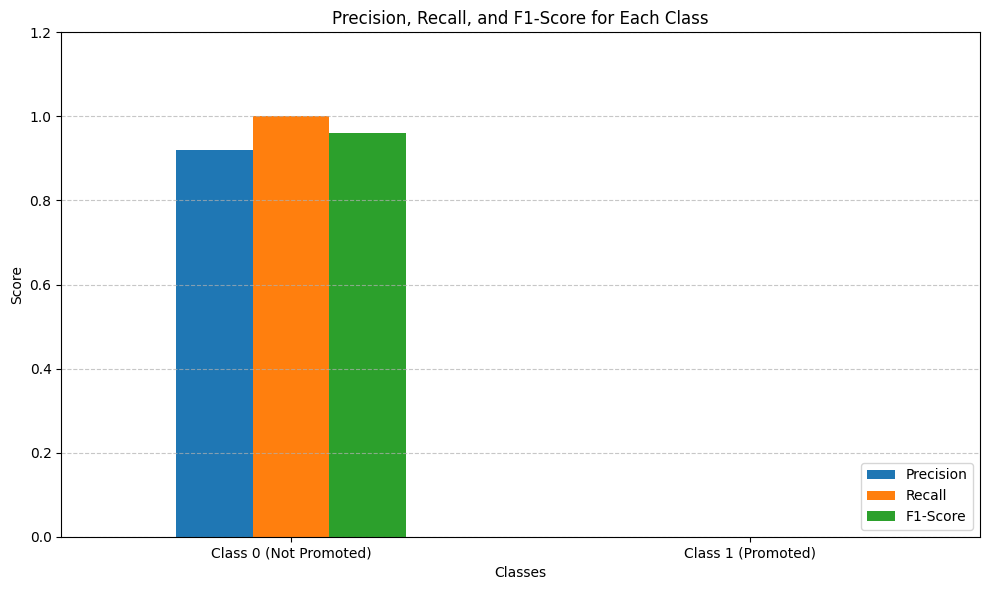

In [193]:
report_df.plot(kind='bar', figsize=(10, 6), rot=0)
plt.title('Precision, Recall, and F1-Score for Each Class')
plt.xlabel('Classes')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.ylim([0, 1.2])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# **3. Visualisation**

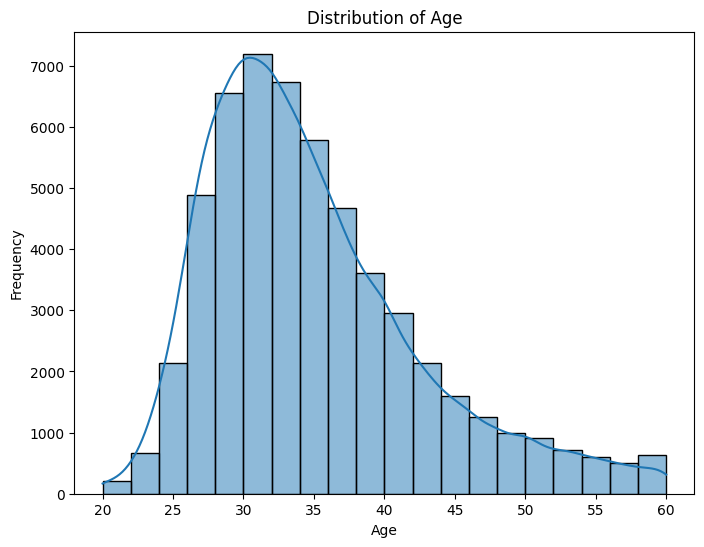

In [194]:
# Hist For Distrubution of Age & Frequency

plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<ipython-input-195-417d234d1297>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


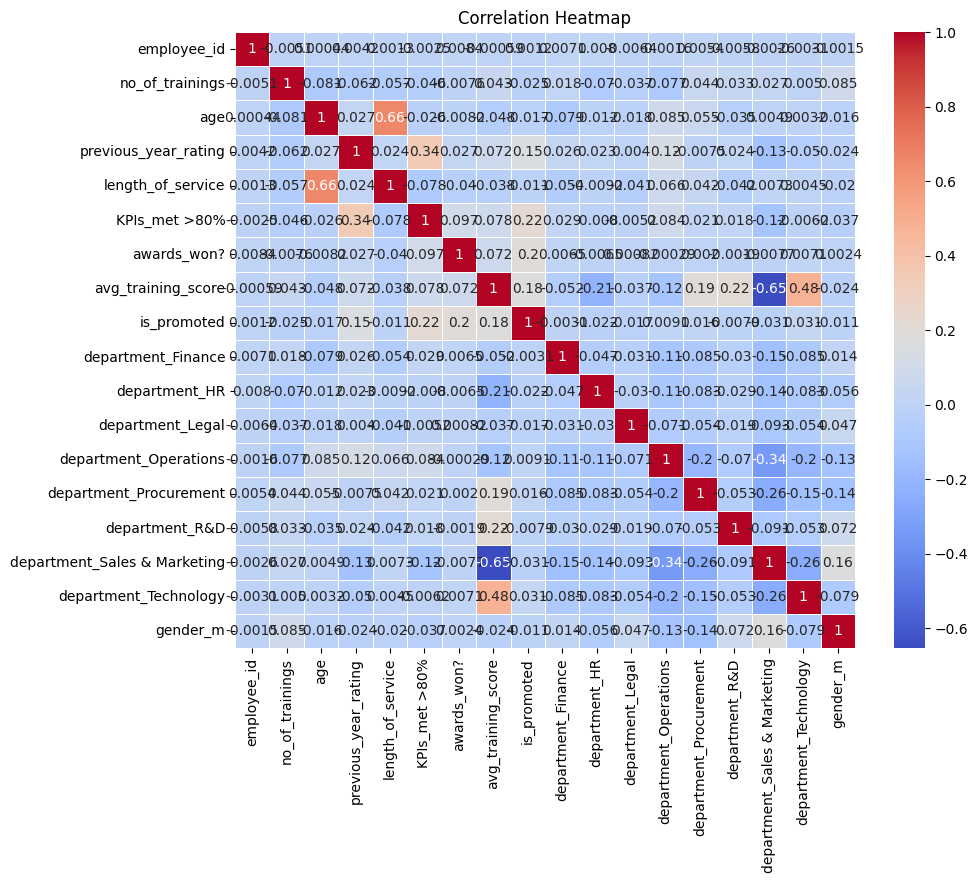

In [195]:
# Calculating CORR Matrix

corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

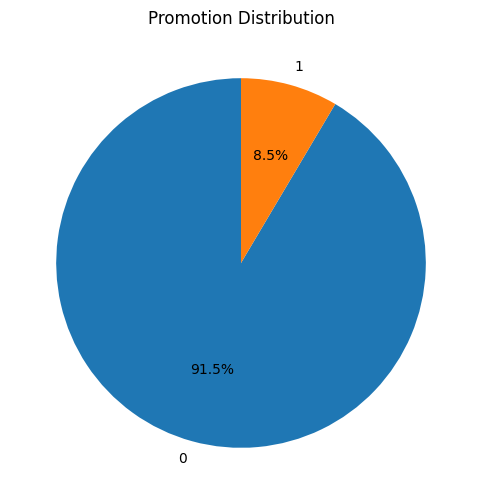

In [196]:
# Pie Chart on Promotion

gender_counts = df['is_promoted'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Promotion Distribution')
plt.show()

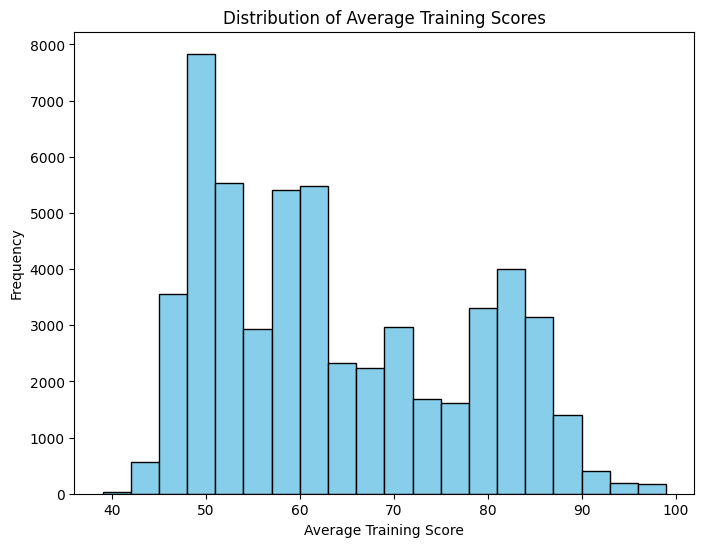

In [197]:
# Count Hist on average_training_score

plt.figure(figsize=(8, 6))
plt.hist(df['avg_training_score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Average Training Scores')
plt.xlabel('Average Training Score')
plt.ylabel('Frequency')
plt.show()


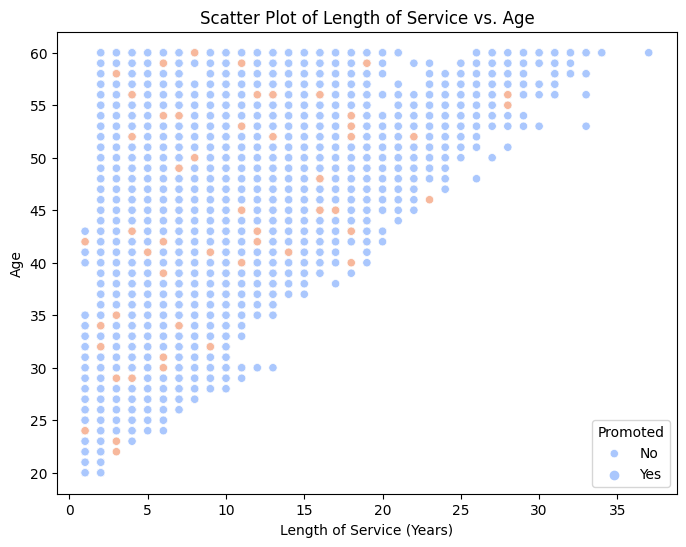

In [198]:
# Create Scatter Plot On Length Service vs. AGe

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='length_of_service', y='age', hue='is_promoted', palette='coolwarm')
plt.title('Scatter Plot of Length of Service vs. Age')
plt.xlabel('Length of Service (Years)')
plt.ylabel('Age')
plt.legend(title='Promoted', labels=['No', 'Yes'])
plt.show()


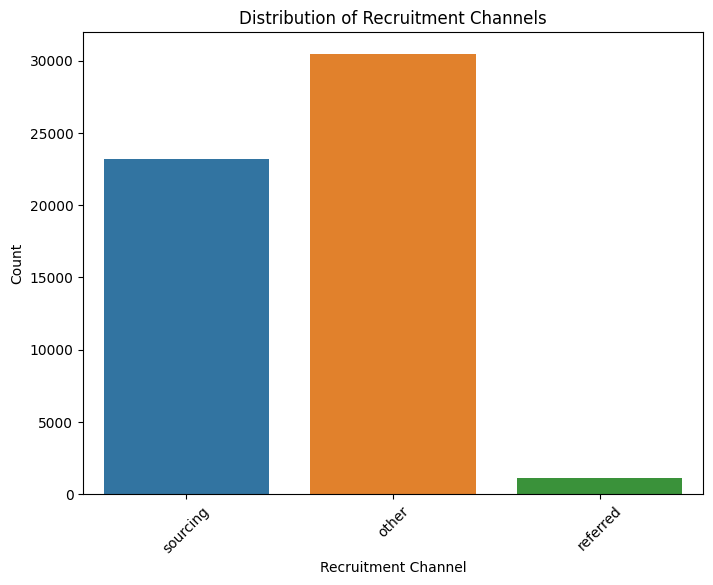

In [199]:
# Create Counter Plot For Ricrutment Channel

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='recruitment_channel')
plt.title('Distribution of Recruitment Channels')
plt.xlabel('Recruitment Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


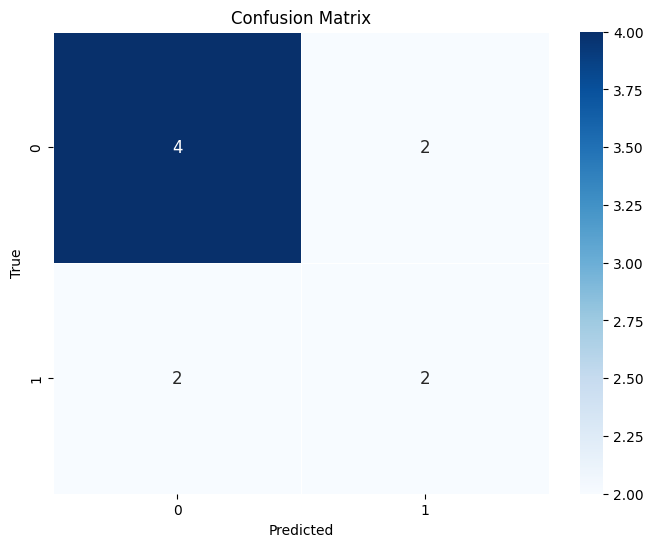

In [200]:
from sklearn.metrics import confusion_matrix

#  Predictin on true Table
y_true = [0, 1, 0, 1, 1, 0, 0, 1, 0, 0]  # Replace with your actual true labels (0 for 'Not Promoted', 1 for 'Promoted')
y_pred = [0, 1, 0, 1, 0, 1, 0, 0, 1, 0]  # Replace with your model's predicted labels

cm = confusion_matrix(y_true, y_pred)

# Heatmap of CM
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, annot_kws={"fontsize": 12})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [201]:
# Calculating TRAIN S AUC
train_score = model.score(X_train, y_train)

# Calculating TEST S AUC
test_score = model.score(X_test, y_test)

# SCORE
print("Training Set Score:", train_score)
print("Testing Set Score:", test_score)


Training Set Score: 0.9142453131414496
Testing Set Score: 0.9169859514687101


In [202]:
print("Training Set Score:", train_score*100)
print("Testing Set Score:", test_score*100)

Training Set Score: 91.42453131414496
Testing Set Score: 91.69859514687101


# **5. Conclusion**

In conclusion, the analysis of employee development data provided valuable insights into the factors affecting performance at the organizational level This data set has been an important resource for understanding incremental development dynamics and paving the way for evidence-based decision-making.

Key findings from the study include things like last year’s scores, KPI progress, grades achieved as important indicators of progress etc. It was identified that some departments and agencies may need training and development programmes targeted to address developmental gaps. It also improved gender equality in promotion and recruitment processes, and called for more inclusive practices and recruitment efforts

Furthermore, the correlation between training scores and promotions highlights the importance of ongoing professional development programs. For employees who struggle to meet KPIs or achieve high scores, tailored performance improvement programs can be beneficial.

Length of service also plays a role in promotion, so that strategies can be considered for retention of skilled workers with potential for growth. Regular monitoring and evaluation of promotion rates and strategies is essential to ensure they align with organizational objectives.